In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Load Dataset
# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, index_col='Month', parse_dates=True)
data.index.freq = 'MS' # Monthly start frequency

In [5]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


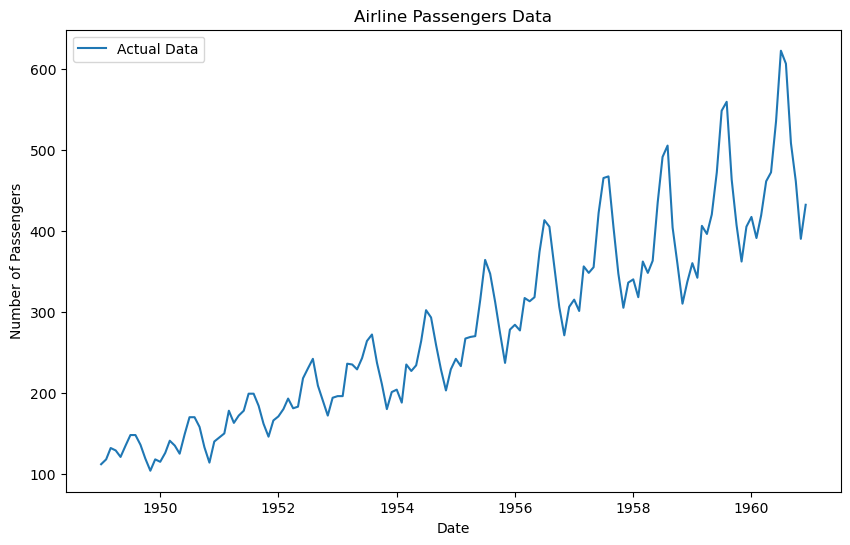

In [7]:
#Plot dataset
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Data')
plt.title('Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [13]:
# Simple Moving Average (SMA) 
data['SMA_12'] = data['Passengers'].rolling (window=12).mean()

# Exponential Smoothing (ETS)
model_ets = ExponentialSmoothing (data['Passengers'], trend='add', seasonal='add', 
                                  seasonal_periods=12 )
data['ETS'] = model_ets.fit().fittedvalues

# Linear Regression Model for Trend
data['t'] = np.arange(1, len(data)+1)
X = data[['t']]
y = data['Passengers']
model_lr = LinearRegression()
model_lr.fit(X, y)
data['LR'] = model_lr.predict(X)

In [15]:
data

,Passengers,ETS,t,LR,SMA_12
Month,,,,,
1949-01-01,112,111.986872,1,90.309962,NaN
1949-02-01,118,120.138781,2,92.967146,NaN
1949-03-01,132,134.669157,3,95.624330,NaN
1949-04-01,129,131.379385,4,98.281513,NaN
1949-05-01,121,124.627330,5,100.938697,NaN
...,...,...,...,...,...
1960-08-01,606,608.232321,140,459.658525,463.333333
1960-09-01,508,507.657562,141,462.315709,467.083333
1960-10-01,461,451.326014,142,464.972893,471.583333


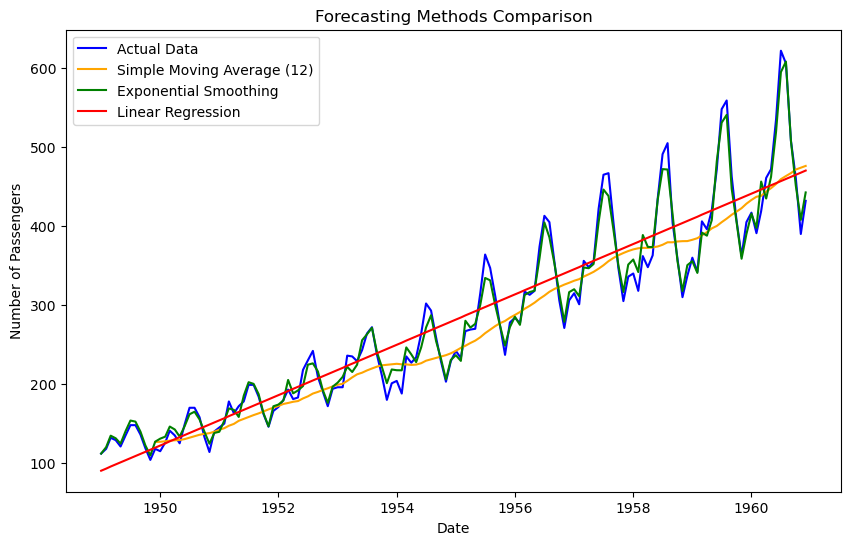

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Actual Data' ,color='blue')
plt.plot(data['SMA_12'], label='Simple Moving Average (12)', color='orange')
plt.plot(data['ETS'], label='Exponential Smoothing', color='green')
plt.plot(data['LR'], label='Linear Regression', color='red')
plt.title('Forecasting Methods Comparison')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [27]:
# Future forecasting using Linear Regression
future_periods = 12 # Forecast for the next 12 months
future_t = np.arange(len(data) + 1, len(data) + future_periods + 1).reshape(-1, 1)
future_forecast_lr = model_lr.predict(future_t)

# Display future predictions
future_dates = pd.date_range (start=data.index[-1] + pd. DateOffset (months=1), 
                              periods=future_periods, freq ='MS')
forecast_df = pd.DataFrame({'Forecast_LR': future_forecast_lr}, index=future_dates)
print(forecast_df)

            Forecast_LR
1961-01-01   472.944444
1961-02-01   475.601628
1961-03-01   478.258812
1961-04-01   480.915996
1961-05-01   483.573180
1961-06-01   486.230364
1961-07-01   488.887548
1961-08-01   491.544732
1961-09-01   494.201916
1961-10-01   496.859100
1961-11-01   499.516284
1961-12-01   502.173467


D:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


D:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


            Forecast_LR  Forecast_SMA  Forecast_ETS
1961-01-01   472.944444    476.166667    451.577922
1961-02-01   475.601628    476.166667    427.258353
1961-03-01   478.258812    476.166667    464.699088
1961-04-01   480.915996    476.166667    500.103959
1961-05-01   483.573180    476.166667    508.661708
1961-06-01   486.230364    476.166667    567.715022
1961-07-01   488.887548    476.166667    647.898900
1961-08-01   491.544732    476.166667    632.462628
1961-09-01   494.201916    476.166667    534.376152
1961-10-01   496.859100    476.166667    484.933179
1961-11-01   499.516284    476.166667    418.461425
1961-12-01   502.173467    476.166667    471.061934


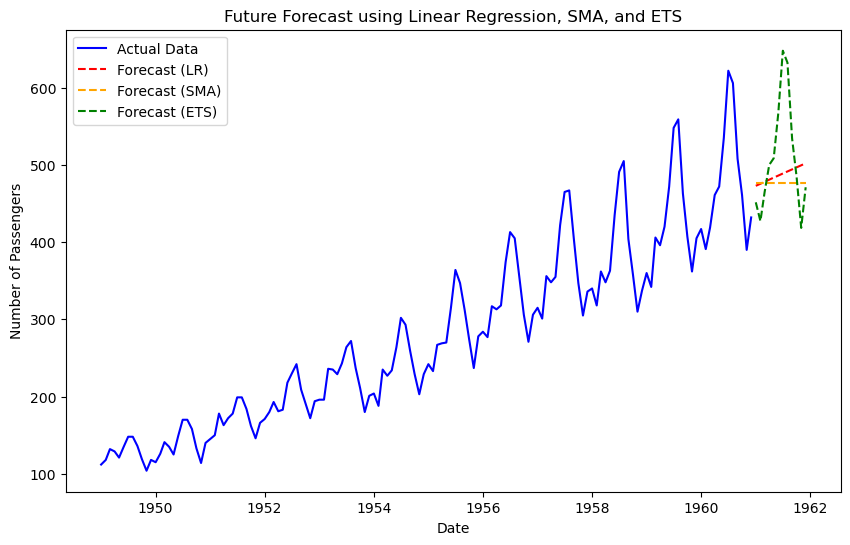

In [33]:
# Mengatur periode peramalan
future_periods = 12 # Peramalan untuk 12 bulan ke depan

# Membuat rentang waktu untuk data masa depan
future_t = np.arange(len(data) + 1, len(data) + future_periods + 1).reshape(-1, 1)

# Future forecasting using Linear Regression
future_forecast_lr = model_lr.predict(future_t)

# Future forecasting using Simple Moving Average (SMA)
#SMA hanya dapat digunakan jika ada data masa Lalu, jadi kita ambil nilai SMA dari data yang ada
last_sma_value = data['SMA_12'].iloc[-1]
sma_forecast = np.array([last_sma_value] * future_periods)

# Future forecasting using Exponential Smoothing (ETS)
model_ets_future = ExponentialSmoothing(data['Passengers'], trend='add', seasonal='add', 
                                        seasonal_periods=12)
model_ets_fit = model_ets_future.fit()
future_forecast_ets = model_ets_fit.forecast(future_periods)

# Menampilkan prediksi masa depan
future_dates = pd.date_range (start=data.index[-1] + pd. DateOffset (months=1), 
                              periods=future_periods, freq ='MS')
forecast_df = pd.DataFrame({
    'Forecast_LR': future_forecast_lr, 'Forecast_SMA':sma_forecast,
    'Forecast_ETS':future_forecast_ets}, index=future_dates)
print(forecast_df)
# Menggambar peramalan masa depan
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Actual Data', color='blue')
plt.plot(forecast_df['Forecast_LR'], label='Forecast (LR)', color='red', linestyle='--')
plt.plot(forecast_df['Forecast_SMA'], label='Forecast (SMA)', color='orange', linestyle='--') 
plt.plot(forecast_df['Forecast_ETS'], label='Forecast (ETS)',color='green', linestyle='--')
plt.title('Future Forecast using Linear Regression, SMA, and ETS')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()